In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

import plotly as py
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [2]:
def scrape_reuters(ticker, name='placeholder'):
    """ Scrapes reuters for financial data """
    url = f'https://www.reuters.com/finance/stocks/financial-highlights/{ticker}'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'lxml')
    
    divs = soup.find_all('div', attrs={'class': 'moduleBody'})
    tables = [div.find('table') for div in divs]

    dataframes = {}
    for idx, table in enumerate(tables):
        if table is not None:
            trs = [tr for tr in table.find_all('tr')]
            headers = [th.text.strip() for th in table.find_all('th')]
            rows = [headers]
            for tr in trs:
                row = [td.text.strip() for td in tr.find_all('td')]
                rows.append(row)
            dataframes[idx] = pd.DataFrame(rows)
            dataframes[idx].columns = dataframes[idx].iloc[0]
            dataframes[idx].drop([0, 1], inplace=True)

    # Useful ones: 3, 4, 5, 6, 7, 8, 9
    keep_these = [3, 4, 5, 6, 7, 8, 9]
    dataframes = {k:v for k, v in dataframes.items() if k in keep_these}
    
    for idx in keep_these:
        dataframes[idx].set_index('', inplace=True)
        dataframes[idx].dropna(inplace=True)
        
    df = pd.concat([df for df in dataframes.values()])
    df['Ticker'] = ticker
    df['Company Name'] = name
        
    return df

In [3]:
# Each tuple must be a valid ticker and any name you want
companies = [
    ('9613.T', 'NTT Data Corp'),
    ('T.TO', 'Telus Corp'),
    ('MMS', 'Maximus Inc'),
    ('ACN', 'Accenture Plc'),
    ('CTSH.O', 'Cognizant Technology Solutions Corp'),
    ('GIB', 'CGI Inc'),
    #('TTM', 'TATA Motors'),
    #('TCS.NS, 'TATA Consulting Services Ltd'),
    ('DXC', 'DXC Technology Co'),
    ('IBM', 'IBM')
]

In [4]:
# Scrape data
import time

master_df = pd.DataFrame()
for ticker, name in companies:
    print(f"Scraping data for {name}")
    # Sleep for good measure
    time.sleep(1)
    single_company_df = scrape_reuters(ticker, name)
    master_df = pd.concat([master_df, single_company_df])

Scraping data for NTT Data Corp
Scraping data for Telus Corp
Scraping data for Maximus Inc
Scraping data for Accenture Plc
Scraping data for Cognizant Technology Solutions Corp
Scraping data for CGI Inc
Scraping data for DXC Technology Co
Scraping data for IBM


In [29]:
master_df.to_csv('financial_data.csv')

In [26]:
print('Ratios Available')
print('\n')
import pprint
pprint.pprint(list(master_df.index.unique()))

Ratios Available


['P/E Ratio (TTM)',
 'P/E High - Last 5 Yrs.',
 'P/E Low - Last 5 Yrs.',
 'Beta',
 'Price to Sales (TTM)',
 'Price to Book (MRQ)',
 'Price to Tangible Book (MRQ)',
 'Price to Cash Flow (TTM)',
 '% Owned Institutions',
 'Dividend Yield',
 'Dividend Yield - 5 Year Avg',
 'Dividend 5 Year Growth Rate',
 'Payout Ratio(TTM)',
 'Sales (MRQ) vs Qtr. 1 Yr. Ago',
 'Sales (TTM) vs TTM 1 Yr. Ago',
 'Sales - 5 Yr. Growth Rate',
 'EPS (MRQ) vs Qtr. 1 Yr. Ago',
 'EPS (TTM) vs TTM 1 Yr. Ago',
 'EPS - 5 Yr. Growth Rate',
 'Capital Spending - 5 Yr. Growth Rate',
 'Quick Ratio (MRQ)',
 'Current Ratio (MRQ)',
 'LT Debt to Equity (MRQ)',
 'Total Debt to Equity (MRQ)',
 'Interest Coverage (TTM)',
 'Gross Margin (TTM)',
 'Gross Margin - 5 Yr. Avg.',
 'EBITD Margin (TTM)',
 'EBITD - 5 Yr. Avg',
 'Operating Margin (TTM)',
 'Operating Margin - 5 Yr. Avg.',
 'Pre-Tax Margin (TTM)',
 'Pre-Tax Margin - 5 Yr. Avg.',
 'Net Profit Margin (TTM)',
 'Net Profit Margin - 5 Yr. Avg.',
 'Effective Tax R

In [18]:

def plot_ratio(df, ratio, size=(600,400)):
    if ratio not in df.index:
        raise KeyError('Ratio not available')
    
    df = df.loc[ratio]
    trace = go.Bar(
        x=df['Company Name'],
        y=df['Company'],
    )

    data = [trace]

    layout = go.Layout(
        title=ratio,
    )

    fig = go.Figure(data=data, layout=layout)

    py.offline.iplot(fig)

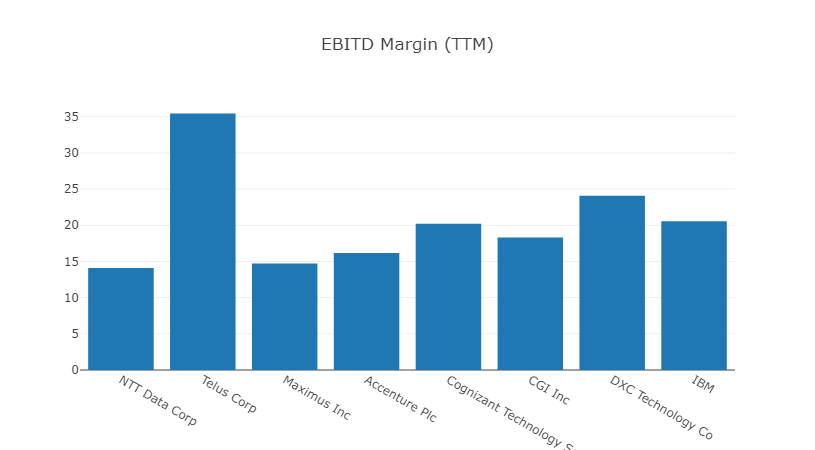

In [23]:
plot_ratio(master_df, 'EBITD Margin (TTM)')

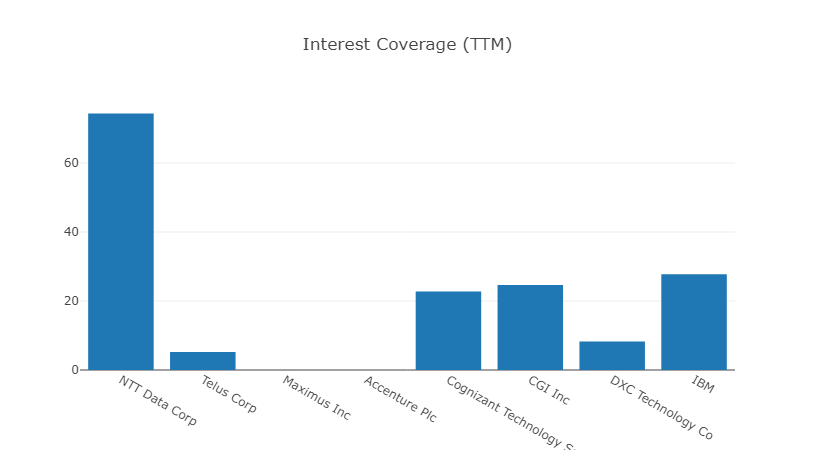

In [24]:
plot_ratio(master_df, 'Interest Coverage (TTM)')

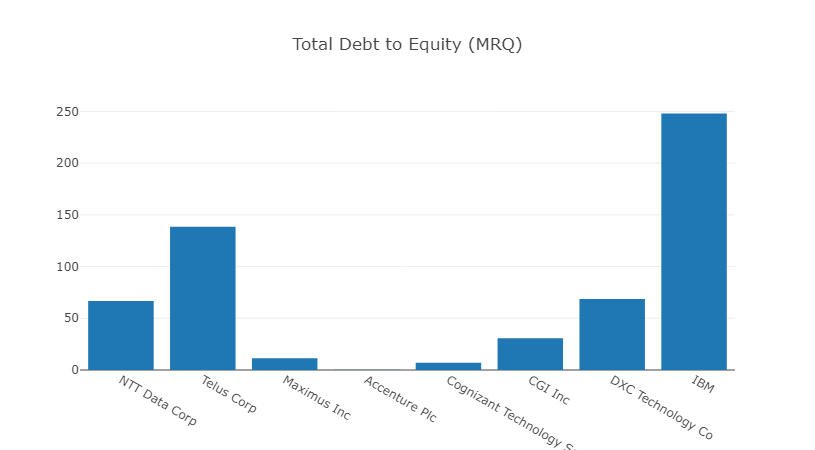

Note that values are multiplied by 100, so 129 means Debt is 1.29 times Equity


In [28]:
plot_ratio(master_df, 'Total Debt to Equity (MRQ)')
print('Note that values are multiplied by 100, so 129 means Debt is 1.29 times Equity')

In [27]:
# Single company data
company = 'Telus Corp'
master_df.loc[master_df['Company Name'] == company]

,Company,industry,sector,Ticker,Company Name
,,,,,
P/E Ratio (TTM),18.47,20.14,20.17,T.TO,Telus Corp
P/E High - Last 5 Yrs.,20.74,27.41,30.09,T.TO,Telus Corp
P/E Low - Last 5 Yrs.,16.72,18.70,20.01,T.TO,Telus Corp
Beta,0.86,0.59,0.61,T.TO,Telus Corp
Price to Sales (TTM),2.11,3.01,2.80,T.TO,Telus Corp
Price to Book (MRQ),2.89,3.84,3.59,T.TO,Telus Corp
Price to Tangible Book (MRQ),--,4.11,3.94,T.TO,Telus Corp
Price to Cash Flow (TTM),7.64,8.18,7.82,T.TO,Telus Corp
% Owned Institutions,--,0.00,0.00,T.TO,Telus Corp
